# Simple Linear Regression and Polynomial Regression 

 ## Importing libs and  Loading dataset 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
dataset.head().T

,0,1,2,3,4
Position,Business Analyst,Junior Consultant,Senior Consultant,Manager,Country Manager
Level,1,2,3,4,5
Salary,45000,50000,60000,80000,110000


In [3]:
dataset.tail().T

,5,6,7,8,9
Position,Region Manager,Partner,Senior Partner,C-level,CEO
Level,6,7,8,9,10
Salary,150000,200000,300000,500000,1000000


## Ploting Salary vs Position Level

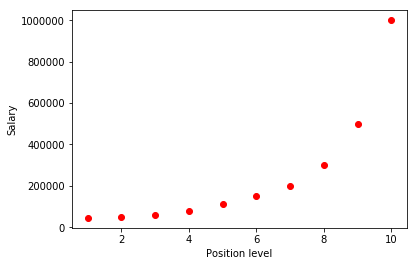

In [4]:
plt.scatter(X, y, color = 'red')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Fitting and predicting the LR model

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Predited salary for position level 6.5 is {:.2f}".format(lin_reg.predict(6.5)[0])) 

Predited salary for position level 6.5 is 330378.79


In [6]:
print("Linear regression score:{:.3f}".format(lin_reg.score(X,y)))

Linear regression score:0.669


In [7]:
from sklearn.metrics import r2_score
pred=lin_reg.predict(X) 
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(r2_score(y,pred)))

Model has a coefficient of determination, R^2, of 0.669.


In [8]:
print("Predicting function y=ax+b where")
print("a="+str(lin_reg.coef_[0]))
print("b="+str(lin_reg.intercept_))

Predicting function y=ax+b where
a=80878.78787878786
b=-195333.3333333332


## Plotting

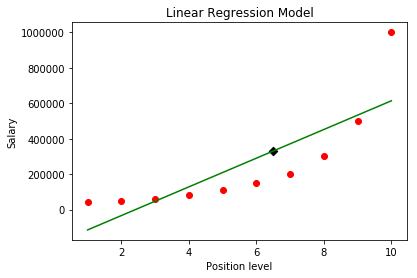

In [17]:
plt.scatter(X, y, color = 'red')
plt.scatter([6.5],lin_reg.predict(6.5), color ='black', marker ='D')
plt.plot(X, lin_reg.predict(X), color = 'green')
plt.title('Linear Regression Model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Fitting a Polynomial Regression 

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg_4 = PolynomialFeatures(degree = 4)
X_poly = poly_reg_4.fit_transform(X)

lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly, y)

print("Predited salary for position level 6.5 is {:.2f}"\
      .format(lin_reg_4.predict(poly_reg_4.fit_transform(6.5))[0]))

Predited salary for position level 6.5 is 158862.45


In [11]:
print("Polynomial regression score:", lin_reg_4.score(X_poly,y))

Polynomial regression score: 0.9973922891706614


In [12]:
print("a="+str(lin_reg_4.coef_))
print("b="+str(lin_reg_4.intercept_))

a=[      0.         -211002.33100266   94765.44289054  -15463.2867133
     890.15151515]
b=184166.66666706698


## Plotting 

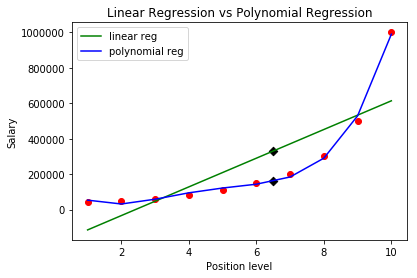

In [13]:
plt.scatter(X, y, color = 'red')
plt.scatter([6.5,6.5],[lin_reg.predict(6.5)[0],lin_reg_4.predict(poly_reg_4.fit_transform(6.5))[0]],\
            color ='black', marker ='D')
plt.plot(X, lin_reg.predict(X), color = 'green', label ='linear reg')
plt.plot(X, lin_reg_4.predict(poly_reg_4.fit_transform(X)), color = 'blue',\
         label='polynomial reg')
plt.title('Linear Regression vs Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Pipeline 

In [14]:
from sklearn.pipeline import Pipeline
poly_reg_2 = PolynomialFeatures(degree = 2)
lin_reg_2 = LinearRegression()
steps=[('poly_features', poly_reg_2),('linear_regression',lin_reg_2)]
pipeline = Pipeline(steps)
pipeline.fit(X, y)

print("Predited salary for position level 6.5 is {:.2f}".format(pipeline.predict(6.5)[0]))

Predited salary for position level 6.5 is 189498.11


In [15]:
from sklearn.metrics import r2_score
y_pred=pipeline.predict(X)
score = r2_score(y,y_pred)
print("R^2 score: {:.3f}.".format(score))

R^2 score: 0.916.


## Plotting 

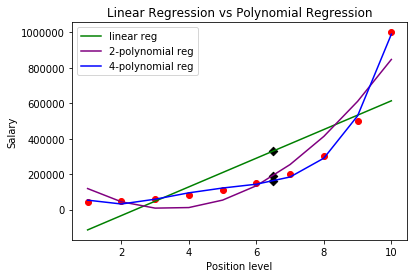

In [16]:
plt.scatter(X, y, color = 'red')
plt.scatter([6.5,6.5,6.5],[lin_reg.predict(6.5)[0],lin_reg_4.predict(poly_reg_4.fit_transform(6.5))[0],\
            pipeline.predict(6.5)[0]],color ='black', marker ='D')
plt.plot(X, lin_reg.predict(X), color = 'green', label ='linear reg')
plt.plot(X, pipeline.predict(X), color = 'purple', label ='2-polynomial reg')
plt.plot(X, lin_reg_4.predict(poly_reg_4.fit_transform(X)), color = 'blue',\
         label='4-polynomial reg')
plt.title('Linear Regression vs Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()